- Determinar si el \"tiempo de respuesta\" de \"cuatro algoritmos\" para la solución del ordenamiento de datos son diferentes

# A. HIPÓTESIS DE INVESTIGACIÓN

- H1: Determinar si el tiempo de respuesta de 4 algoritmos son diferentes

- H0: Determinar si el tiempo de respuesta de 4 algoritmos son iguales

# B. POBLACIÓN

- Miles de usuarios que ejecutan dichos

# C. MUESTRA

* Algoritmo A. 5 Usuarios
* Algoritmo B. 6 Usuarios
* Algoritmo C. 4 Usuarios
* Algoritmo D. 5 Usuarios

# D. Significancia

- Error tipo 1 se propone el investigador (es la probabilidad que se tiene de rechazar la hipótesis nula cuando esta es verdadera)
- α = 0.05 = 5 / 100 = 5%

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as ss
import pandas as pd

In [3]:
# Variables dependientes: Tiempo de respuesta en ms (milisegundos)
_A = np.array([14, 15, 13, 14, 13]) 
_B = np.array([18, 20, 18, 19, 21, 20])
_C = np.array([11, 13, 12, 11])
_D = np.array([17, 16, 15, 18, 16])

In [4]:
dfA = pd.DataFrame({'A': _A})
dfB = pd.DataFrame({'B': _B})
dfC = pd.DataFrame({'C': _C})
dfD = pd.DataFrame({'D': _D})

# E. DATOS

In [5]:
dfA.describe(), dfB.describe(), dfC.describe(), dfD.describe()

(              A
 count   5.00000
 mean   13.80000
 std     0.83666
 min    13.00000
 25%    13.00000
 50%    14.00000
 75%    14.00000
 max    15.00000,
                B
 count   6.000000
 mean   19.333333
 std     1.211060
 min    18.000000
 25%    18.250000
 50%    19.500000
 75%    20.000000
 max    21.000000,
                C
 count   4.000000
 mean   11.750000
 std     0.957427
 min    11.000000
 25%    11.000000
 50%    11.500000
 75%    12.250000
 max    13.000000,
                D
 count   5.000000
 mean   16.400000
 std     1.140175
 min    15.000000
 25%    16.000000
 50%    16.000000
 75%    17.000000
 max    18.000000)

# F. HIPÓTESIS ESTADÍSTICA

- H0: μa = μb = μc = μd
- H1: Por lo menos un -> μi ≠ μn

# G. TIPO DE PRUEBA

- Prueba es F (Fisher)

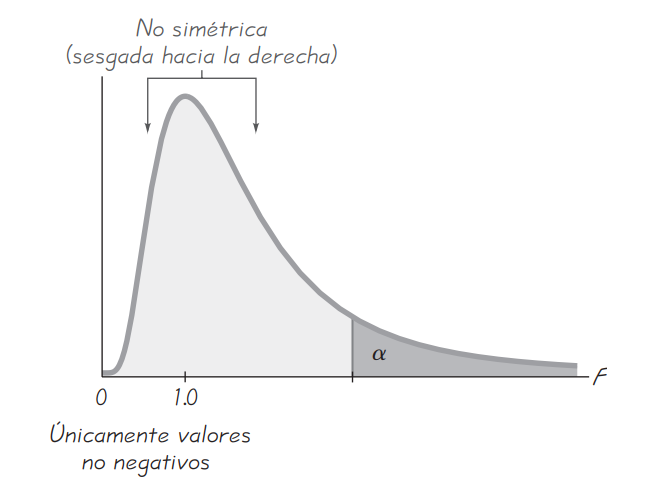

# H. ESTADÍSTICO DE PRUEBA

- F (Fisher)


In [90]:
def sum_square_normal(*args):
    sct, n, _sm_values = 0, 0, 0
    
    for i in args[0]:
        _sm_values += np.sum(i)
        sct += np.sum(i ** 2)
        n += np.size(i)
        
    return [sct - _sm_values ** 2 / n, _sm_values, n]

def sum_square_alt(*args, _sm_values, n):
    sce = 0
    
    for i in args[0]:
        sce += (np.sum(i) ** 2 / np.size(i))
        
    return [sce - _sm_values ** 2 / n]

def anova_normal(*args, alpha=0.05):
    sct, sce, scd = 0, 0, 0

    first = sum_square_normal(args)
    second = sum_square_alt(args, _sm_values=first[1], n=first[2])
    sce = second[0]
    sct = first[0]
    scd = sct - sce
    
    _k = len(args)
    _n = first[2]
    _k_gl = _k - 1
    _e_gl = _n - _k
    _t_gl = _n - 1

    # cuadrados medios y extremos
    ms_w = sce / _k_gl
    ms_k = scd / _e_gl
    
    # estadístico de prueba (Fisher)
    f = ms_w / ms_k
    
    # cálculo del p-value
    p_value = ss.f.sf(f, _k_gl, _e_gl)
    
    # calculo de F critica
    Fc = ss.f.ppf(1-alpha, _k_gl, _e_gl)
    
    print("El F critico es:", Fc)
    print("El p-value es:", p_value)
    print("El estadístico de prueba es:", f)
    
    

In [91]:
anova_normal(_A, _B, _C, _D)

El F critico es: 3.238871517453585
El p-value es: 3.276739291304252e-08
El estadístico de prueba es: 47.813210445469345


In [7]:
# suma de cuadrados
_sm_square = np.sum(_A ** 2) + np.sum(_B ** 2) + np.sum(_C ** 2) + np.sum(_D ** 2)

# suma de valores
_sm_values = (np.sum(_A) + np.sum(_B) + np.sum(_C) + np.sum(_D)) ** 2 / (np.size(_A) + np.size(_B) + np.size(_C) + np.size(_D))

# respuesta final
sct = _sm_square - _sm_values
sct

180.19999999999982

In [7]:
# suma de cuadrados de los valores

_sm_square = ((np.sum(_A) ** 2) / np.size(_A) + (np.sum(_B) ** 2) / np.size(_B) + (np.sum(_C) ** 2) / np.size(_C) + (np.sum(_D) ** 2) / np.size(_D))
_sm_rest = (np.sum(_A) + np.sum(_B) + np.sum(_C) + np.sum(_D)) ** 2 / (np.size(_A) + np.size(_B) + np.size(_C) + np.size(_D))

# respuesta final
sce = _sm_square - _sm_rest
sce

162.1166666666668

In [8]:
# within variable
scd = sct - sce
scd

18.08333333333303

In [9]:
# num de grupos de datos
_k = 4
_n = np.size(_A) + np.size(_B) + np.size(_C) + np.size(_D)
_k_gl = _k - 1
_e_gl = _n - _k
_t_gl = _n - 1

_k_gl, _e_gl, _t_gl

(3, 16, 19)

In [13]:
# cuadrados medios

ms_w = sce / _k_gl
ms_k = scd / _e_gl

ms_w, ms_k

(54.03888888888893, 1.1302083333333144)

In [14]:
# estadístico de prueba (Fisher)

f = ms_w / ms_k
f

47.813210445469345

In [17]:
# calculo de F critica
Fc = ss.f.ppf(1-0.05, 3, 16)
Fc

3.238871517453585

# F critico

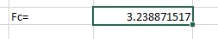

# Creación de la tabla

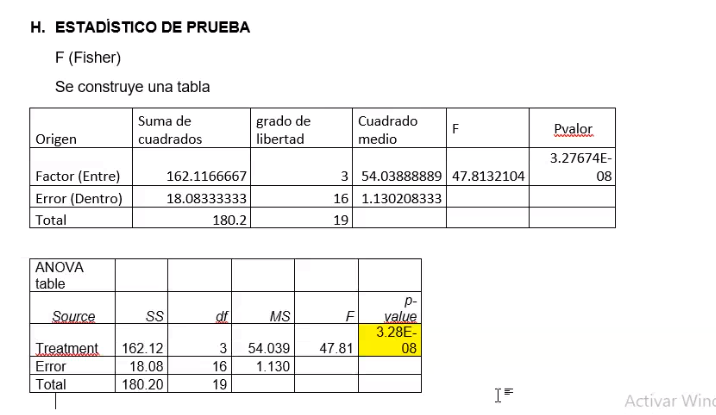

In [19]:
# método directo para la aplicación de un analisis ANOVA simple
ss.f_oneway(_A, _B, _C, _D)

# método bajo el enfoque de kruskal
# ss.kruskal(_A, _B, _C, _D)

F_onewayResult(statistic=47.813210445468485, pvalue=3.2767392913046735e-08)

## Probabilística

- Como P-value = 0.000000000327 es menor a alpha = 0.05, entonces se rechaza la hipótesis nula y se acepta a la hipótesis alterna.

# J. Conclusión

- Existen evidencias en la muestra para afirmar que el tiempo de respuesta de los cuatro algoritmos para la solución de ordenamiento de datos son significativamente diferentes. Con un nivel de confianza del 95%.

# K. Prueba de pos HOC

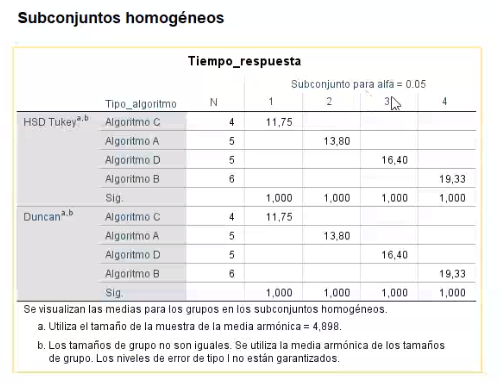